In [6]:
!pip install stability-sdk
!apt-get install libmagic1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 7.2 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libmagic-mgc
Suggested packages:
  file
The following NEW packages will be installed:
  libmagic-mgc libmagic1
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 252 kB of archives.
After this operation, 5,214 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.4 [184 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic1 amd64 1:5.32-2ubuntu0.4 [68.6 kB]
Fetched 252 kB in 1s (365 kB/s)
Selecting previously unselect

In [7]:
import getpass, os

# To get your API key, visit https://beta.dreamstudio.ai/membership
os.environ['STABILITY_KEY'] = getpass.getpass('Enter your API Key')

Enter your API Key··········


In [8]:
import io
import os
import warnings

from IPython.display import display
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation


stability_api = client.StabilityInference(
    key=os.environ['STABILITY_KEY'], 
    verbose=True,
)

INFO:stability_sdk.client:Opening channel to grpc.stability.ai:443
INFO:stability_sdk.client:Channel opened to grpc.stability.ai:443


INFO:stability_sdk.client:Sending request.
INFO:stability_sdk.client:Got keepalive 416ed40e-e302-4015-aaf5-23c5ae0c1368 in 4.97s
INFO:stability_sdk.client:Got 3ac00e4f-afd7-4ff8-9c65-751b08a368e1 with ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS'] in 0.19s


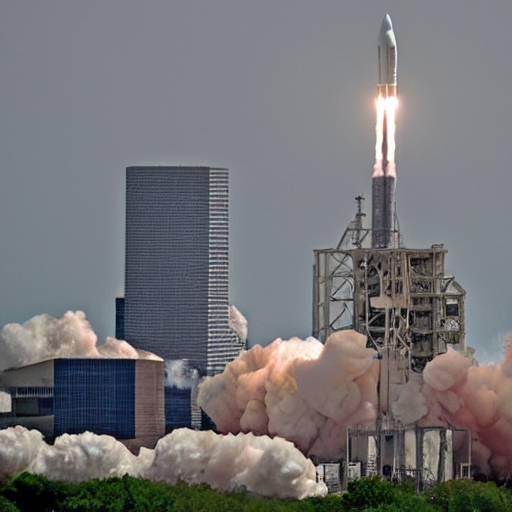

In [9]:
# the object returned is a python generator
answers = stability_api.generate(
    prompt="houston, we are a 'go' for launch!"
)

# iterating over the generator produces the api response
for resp in answers:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn(
                "Your request activated the API's safety filters and could not be processed."
                "Please modify the prompt and try again.")
        if artifact.type == generation.ARTIFACT_IMAGE:
            img = Image.open(io.BytesIO(artifact.binary))
            display(img)


In [ ]:
!pip install param panel

Row
    [0] Column(margin=5, name='BaseClass', width=300)
        [0] StaticText(value='<b>BaseClass</b>')
        [1] Button(name='Dream')
        [2] TextInput(name='Prompt', value='A beautiful painting of y...)
        [3] IntSlider(end=1024, name='Height', start=256, value=512)
        [4] IntSlider(end=1024, name='Width', start=256, value=512)
        [5] IntSlider(end=9, name='N', start=1, value=1)
        [6] FloatSlider(end=10, name='C', value=7.0)

INFO:stability_sdk.client:Sending request.
INFO:stability_sdk.client:Got keepalive 874d7ded-bc34-4906-9a2c-60c756b4f2cc in 4.82s
INFO:stability_sdk.client:Got a28fbf2b-d4cb-46a8-a3b3-3c67a5b79a59 with ['ARTIFACT_IMAGE', 'ARTIFACT_CLASSIFICATIONS'] in 0.41s


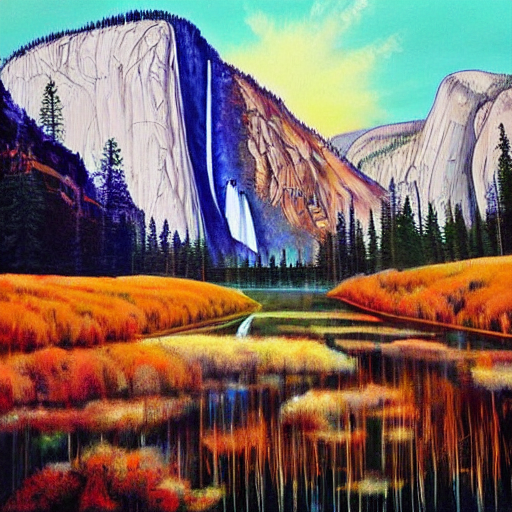

In [16]:
import param
import pandas as pd
import datetime as dt

class BaseClass(param.Parameterized):
    prompt                  = param.String(default="A beautiful painting of yosemite national park, by Neil Gaiman", doc="A string")
    height                  = param.Integer(512, bounds=(256, 1024))
    width                   = param.Integer(512, bounds=(256, 1024))
    n                       = param.Integer(1,  bounds=(1, 9))
    C                       = param.Number(7.0, bounds=(0, None), softbounds=(0,10))
    dream                   = param.Action(lambda self: self._submit(), 
                                           doc="""Generate an image.""", precedence=0)
    def _submit(self):
        answers = stability_api.generate(
            prompt=self.param.values()['prompt'])
        self._process_response(answers)

    def _process_response(self, answers):
        for resp in answers:
            for artifact in resp.artifacts:
                if artifact.finish_reason == generation.FILTER:
                    warnings.warn(
                        "Your request activated the API's safety filters and could not be processed."
                        "Please modify the prompt and try again.")
                if artifact.type == generation.ARTIFACT_IMAGE:
                    img = Image.open(io.BytesIO(artifact.binary))
                    self._show(img)

    def _show(self, img):
        display(img)



import panel as pn

pn.extension()

base = BaseClass()
pn.Row(base.param)